In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
warnings.filterwarnings('ignore')

# 1. Loading Data

In [ ]:
url = '../../Data/d6/diabetes_012_health_indicators_BRFSS2021.csv'
url = glob.glob(url)[0]
df = pd.read_csv(url)
df = df.rename(columns={'Diabetes_012': 'Class'})
for i in df.columns:
    if i != 'BMI':
        df[i] = df[i].astype(int)
df.drop_duplicates(inplace=True)
df['Class'].value_counts()

,count
Class,
0,184542
2,33395
1,5613


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223550 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Class                 223550 non-null  int64  
 1   HighBP                223550 non-null  int64  
 2   HighChol              223550 non-null  int64  
 3   CholCheck             223550 non-null  int64  
 4   BMI                   223550 non-null  float64
 5   Smoker                223550 non-null  int64  
 6   Stroke                223550 non-null  int64  
 7   HeartDiseaseorAttack  223550 non-null  int64  
 8   PhysActivity          223550 non-null  int64  
 9   Fruits                223550 non-null  int64  
 10  Veggies               223550 non-null  int64  
 11  HvyAlcoholConsump     223550 non-null  int64  
 12  AnyHealthcare         223550 non-null  int64  
 13  NoDocbcCost           223550 non-null  int64  
 14  GenHlth               223550 non-null  int64  
 15  MentH

In [12]:
categories_cols = [i for i in df.select_dtypes(include='int64').columns
                   if i not in ['Class', 'MentHlth', 'PhysHlth']]

for col in categories_cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223550 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Class                 223550 non-null  int64   
 1   HighBP                223550 non-null  category
 2   HighChol              223550 non-null  category
 3   CholCheck             223550 non-null  category
 4   BMI                   223550 non-null  float64 
 5   Smoker                223550 non-null  category
 6   Stroke                223550 non-null  category
 7   HeartDiseaseorAttack  223550 non-null  category
 8   PhysActivity          223550 non-null  category
 9   Fruits                223550 non-null  category
 10  Veggies               223550 non-null  category
 11  HvyAlcoholConsump     223550 non-null  category
 12  AnyHealthcare         223550 non-null  category
 13  NoDocbcCost           223550 non-null  category
 14  GenHlth               223550 non-null  ca

In [13]:
df = df.drop(df.select_dtypes(include='category').columns, axis=1)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15006 entries, 0 to 236357
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Class     15006 non-null  int64  
 1   BMI       15006 non-null  float64
 2   MentHlth  15006 non-null  int64  
 3   PhysHlth  15006 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 586.2 KB


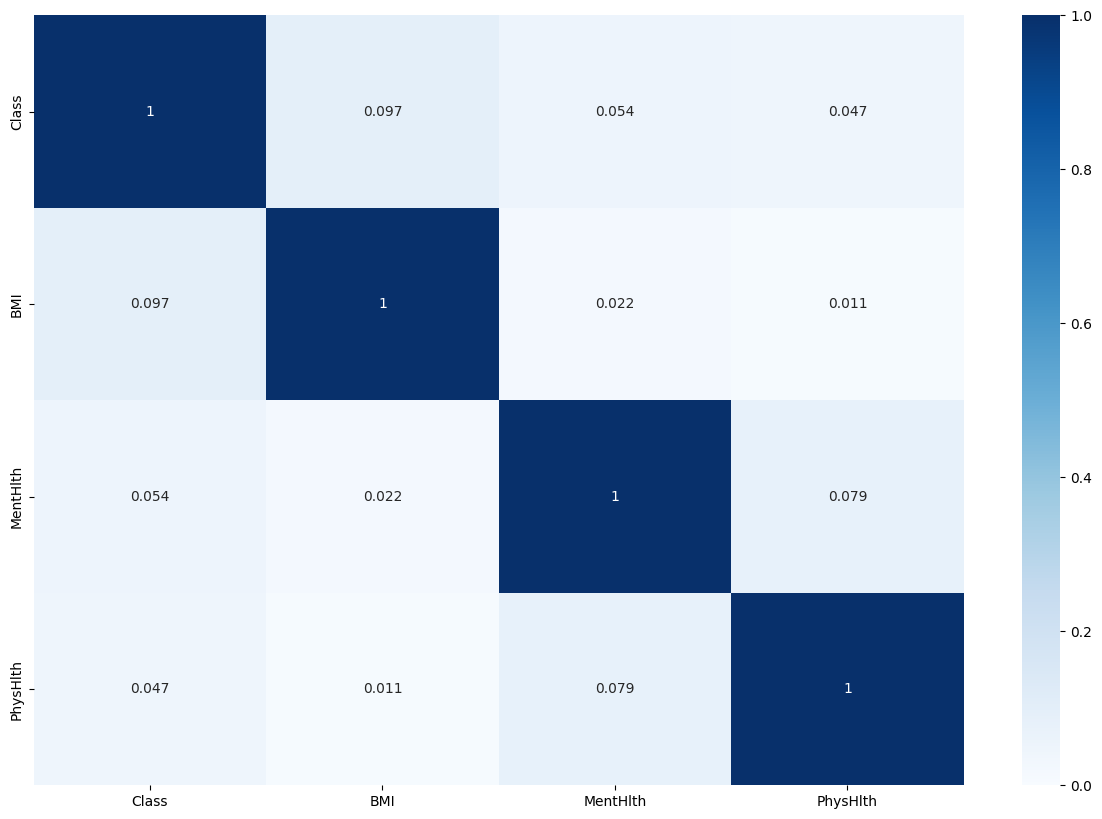

In [14]:
corr = np.abs(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 3. Drop Outliers

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [16]:
model = LocalOutlierFactor(n_neighbors=2)
df['anomaly']= model.fit_predict(df)
df = df[df['anomaly'] == 1]
df.drop('anomaly', axis=1, inplace=True)
df

,Class,BMI,MentHlth,PhysHlth
1,2,28.0,0,0
2,2,33.0,10,0
3,2,29.0,0,30
4,0,24.0,0,0
5,0,40.0,5,25
...,...,...,...,...
236213,0,25.0,21,4
236228,0,28.0,1,28
236335,2,40.0,28,20
236353,1,41.0,7,0


In [17]:
df['Class'].value_counts().sort_index()

,count
Class,
0,8280
1,1700
2,4623


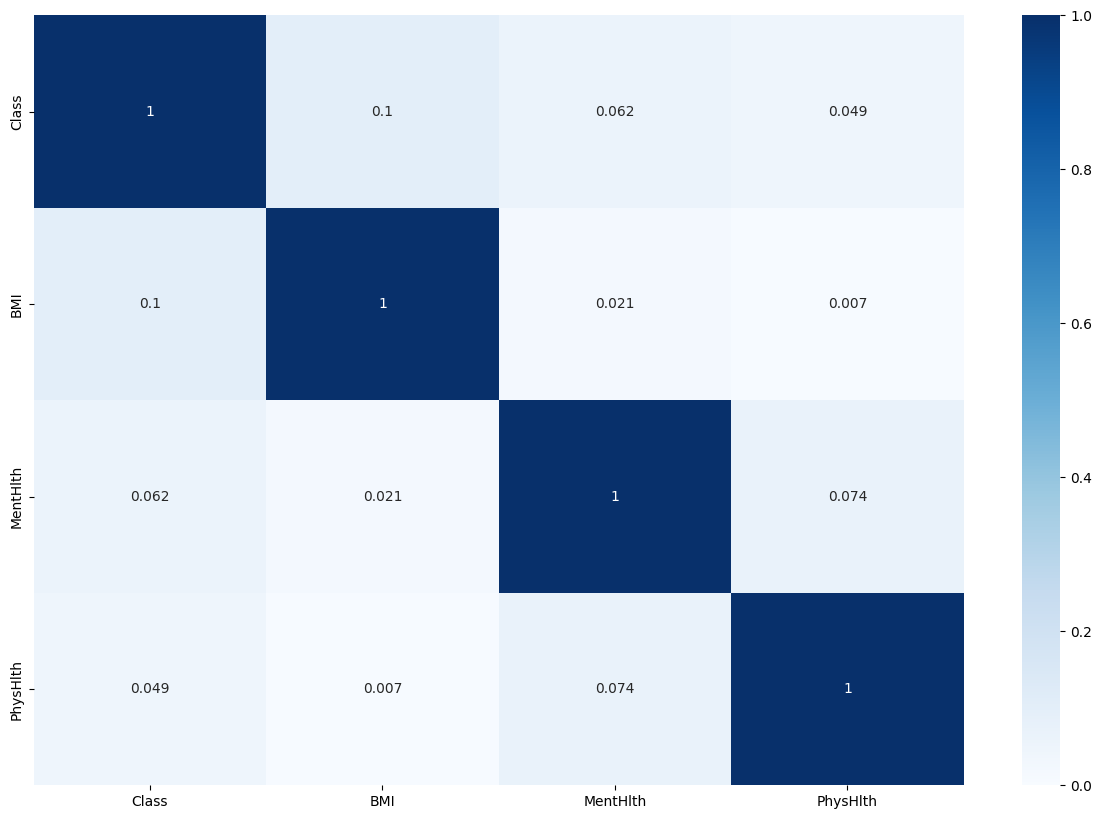

In [18]:
corr = np.abs(df.corr())
corr = np.round(corr, 4)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'Blues', vmax = 1, vmin = 0)
plt.show()

# 4. Save Data

In [ ]:
url = glob.glob('../../Data/d1')[0]
url = url+'/diabetes_012_health_indicators_BRFSS2021_cleaned.csv'
df.to_csv(url, index=False)